In [2]:
import sklearn as sk

In [3]:
import numpy as np
np.random.seed(1001)
import os
import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd  
import wave
from scipy.io import wavfile
rate, data = wavfile.read("molka.wav")
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)
plt.figure(figsize=(16, 4))
plt.plot(data[8000:9000], '.'); plt.plot(data[8000:9000], '-');

('Sampling (frame) rate = ', 16000)
('Total samples (frames) = ', (1600000,))
[-0.16545408  0.00437069  0.07762449 ...  0.42039269  0.82398569
  0.70772778]


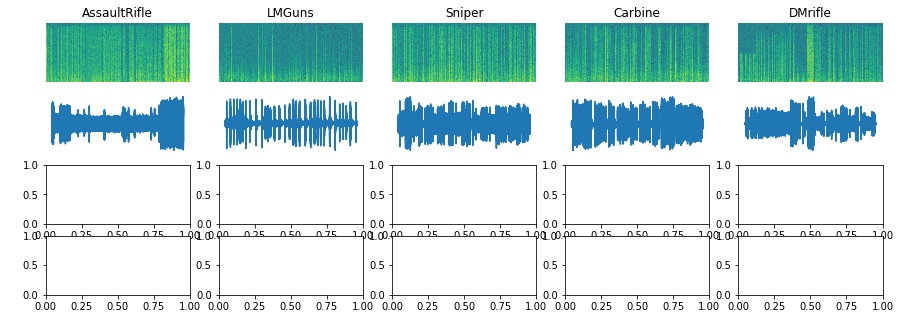

In [4]:
import scipy
from scipy import signal

classes=['AssaultRifle','LMGuns','Sniper','Carbine','DMrifle']
filename=['molka.wav','molka1.wav','molka2.wav','molka4.wav','salma.wav']
z=[]
for i in filename:
    fname =  i
    rate, data = wavfile.read(fname)
    z.append(data)
fig, axs = plt.subplots(4, 5, figsize=(15, 5))
for idx in range(5):
    i, j = int(idx / 5), int(idx % 5)
    sampleFreqs, segmentTimes, sxx = signal.spectrogram(z[idx], 44100)
    axs[i*2][j].pcolormesh((len(segmentTimes) * segmentTimes / segmentTimes[-1]),
                         sampleFreqs,
                         10 * np.log10(sxx + 1e-15))
    axs[i*2][j].set_title(classes[idx])
    axs[i*2][j].set_axis_off()
    axs[i*2+1][j].plot(z[idx])
    axs[i*2+1][j].set_axis_off()
    
plt.show()

In [5]:
import librosa
SAMPLE_RATE = 44100
def parser(row,index):
    file_name = row[index]  
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=SAMPLE_RATE, n_mfcc=40).T,axis=0) 
    feature = mfccs
    label = classes[index]
    return [feature, label]

/usr/local/lib/python2.7/dist-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [6]:
a = []
for i in range(5):
    a.append(parser(filename,i))


NoBackendError: 

In [ ]:
a1=[]
index=0
for i in a:
    a1.append(a[index][0])
    index=index+1
x=np.array(a1)

In [ ]:
b=[]
index=0
for i in a:
    b.append(a[index][1])
    index=index+1
y=np.array(b)

In [ ]:
train_x=x[:320]
train_y=y[0:320]
test_x=x[320:400]
test_y=y[320:400]


In [ ]:
print(train_y)

In [ ]:
print(train_x,test_y)

In [ ]:
import sklearn as sk
classifier_name = 'Support Vector Machine (SVM)'
svm = sk.svm.SVC(C=0.1, kernel='linear', random_state=20150420)
svm.fit(train_x,train_y)

In [ ]:
train_predictions = svm.predict(train_x)
train_acc = 100. * float(sum(train_predictions == train_y))/train_y.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = svm.predict(test_x)
test_acc = 100. * float(sum(test_predictions == test_y))/test_y.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

In [ ]:
import librosa
SAMPLE_RATE = 44100
file_name ='molka4.wav'  
X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=SAMPLE_RATE, n_mfcc=40).T,axis=0)

In [ ]:
b = np.zeros((1,len(mfccs)))
for i in range(0,len(mfccs)):
    b[0,i]=mfccs[i]
svm.predict(b)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelR = RandomForestClassifier(n_estimators = 40)

# train
modelR.fit(train_x, train_y)

In [ ]:
modelR.